<a href="https://colab.research.google.com/github/bruna-lins/Data-Science-Projects/blob/main/Analisando_os_dados_do_Airbnb_%5BToronto%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise dos Dados do Airbnb - *Toronto*

<center><img alt="Analisando Airbnb" width="15%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

<center><img alt="Analisando Airbnb" width="100%" src="https://www.municipalworld.com/wp-content/uploads/2018/03/1227-feb12-815x400.jpg"></center>

O [Airbnb](https://www.airbnb.com.br/) é um mercado comunitário que permite que as pessoas anunciem e descubram acomodações pelo mundo inteiro. 

No final de 2018, a Startup já havia conectado **mais de 300 milhões de hospedes e anfitriões** ao redor do mundo, sendo considerada a **maior empresa de hotelaria da atualidade**, desafiando as redes hoteleiras tradicionais. Ah! e vale a pena frisar: tudo isso **sem possuir nenhum hotel**.

Uma das iniciativas do Airbnb é disponibilizar dados do site sobre as principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível ter acesso a uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

**Neste *notebook*, iremos analisar os dados referentes à cidade de *Toronto*, a fim de extrair alguns insights a partir de dados brutos. Para ilustrar estes insights, serão explicados alguns processos e a partir disso, responderemos algumas perguntas.**

## E por que Toronto?

Toronto é uma das mais famosas e visitadas cidades do Canadá, tendo diversos pontos turisticos como *Toronto Islands*, *Ripley’s Aquarium of Canada*, *Scotiabank Arena*, *Royal Ontario Museum*, *Yonge-Dundas Square*, entre muitos outros. É também um dos principais destino de muitos imigrantes em busca de oportunidades de estudo e emprego, uma vez que possui uma das melhores universidades do mundo e muitas oportunidades de trabalho. Ela é também a [2º cidade com o custo de vida mais alto do Canadá](https://mobilityexchange.mercer.com/Insights/cost-of-living-rankings), perdendo apenas para Vancouver. 

Seja uma viagem turistica, exploratória ou definitiva, muitas pessoas acabam recorrendo ao Airbnb em busca de hospedagens confortáveis que atendam suas necessidades.



<center><img alt="Analisando Airbnb" width="15%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>




## Obtenção dos Dados

Todos os dados utilizados foram obtidos a partir do site [Inside Airbnb](http://insideairbnb.com/get-the-data.html).

Para esta análise exploratória, será baixado apenas o seguinte arquivo:

* `listings.csv` -  *Summary information and metrics for listings in Toronto (good for visualisations).*



In [32]:
# importando os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [33]:
# importando o arquivo listings.csv para um DataFrame
df = pd.read_csv("http://data.insideairbnb.com/canada/on/toronto/2021-02-08/visualisations/listings.csv")

## Análise dos Dados

Esta etapa consiste em entender a situação inicial e como os dados estão estruturados.

**Dicionário das variáveis**

* `id` - número de identificação gerado para o imóvel;
* `name` - nome atribuido a propriedade anunciada; 
* `host_id` - número de identificação do anfitrião (proprietário);
* `host_name` - nome do anfitrião;
* `neighbourhood_group`- esta coluna não contém nenhum valor válido;
* `neighbourhood` - nome do bairro;
* `latitude` - coordenada da latitude da propriedade;
* `longitude` - coordenada da longitude da propriedade;
* `romm_type` - informa o tipo de quarto que é oferecido;
* `price` - preço do aluguel do imóvel;
* `minimum_nights` - quantidade mínima de noites para reservar;
* `number_of_reviews` - número de avaliações que a propriedade possui;
* `last_review` - data da última avaliação;
* `reviews_per_month` - quantidade de avaliações por mês;
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião;
* `availability_365` - número de dias de disponibilidade dentro de 365 dias.

Antes de iniciar a análise, vamos verificar como está nosso *dataset*, analisando as 5 primeiras entradas.

In [34]:
# mostrando as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,1419,Beautiful home in amazing area!,1565,Alexandra,NaN,Little Portugal,43.64617,-79.42451,Entire home/apt,469,28,7,2017-12-04,0.10,1,0
1,8077,Downtown Harbourfront Private Room,22795,Kathie & Larry,NaN,Waterfront Communities-The Island,43.64105,-79.37628,Private room,96,180,169,2013-08-27,1.21,2,365
2,23691,Queen Bedroom close to downtown,93825,Yohan & Sarah,NaN,Briar Hill-Belgravia,43.69602,-79.45468,Private room,72,28,217,2019-12-22,1.66,2,362
3,27423,Executive Studio Unit- Ideal for One Person,118124,Brent,NaN,Greenwood-Coxwell,43.66890,-79.32592,Entire home/apt,45,365,26,2011-08-30,0.20,1,346
4,30931,Downtown Toronto - Waterview Condo,22795,Kathie & Larry,NaN,Waterfront Communities-The Island,43.64151,-79.37643,Entire home/apt,128,180,1,2010-08-11,0.01,2,365


### **Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

Agora iremos identificar a quantidade de entradas que nosso conjunto de dados possui e ver os tipos de cada coluna.

O *dataset* utilizado é a versão "resumida" do Airbnb. Na mesma página que baixamos o arquivo `listings.csv` existe a versão completa com 35847 entradas e 106 variáveis (`listings.csv.gz`), que é recomendada para uma análise exploratória aprofundada.

In [5]:
# identificando o volume de dados do DataFrame
print("Entradas:\t {}".format(df.shape[0]))
print("Variáveis:\t {}\n".format(df.shape[1]))

# verificando as 5 primeiras entradas do dataset
display(df.dtypes)

Entradas:	 15832
Variáveis:	 16



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### **Qual a porcentagem de valores ausentes no *dataset*?**

Sabe-se que a qualidade de um *dataset* está diretamente relacionada à quantidade de valores ausentes, sendo assim é importante entender desde o início se esses valores nulos são significativos comparados ao total de entradas.

Abaixo é possível ver que:

* A coluna `neighbourhood_group` possui 100% dos seus valores faltantes.
* As variáveis `reviews_per_month` e `last_review` possuem por volta de 23% de valores nulos.
* As variáveis `name` e `host_name` têm aproximadamente 0,1% dos valores nulos.

In [6]:
# ordenando as variáveis em ordem decrescente por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

neighbourhood_group               1.000000
reviews_per_month                 0.232377
last_review                       0.232377
host_name                         0.001011
name                              0.000063
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_id                           0.000000
id                                0.000000
dtype: float64

### **Qual o tipo de distribuição das variáveis?** 

Iremos plotar o histograma a fim de identificarmos a distribuição de variáveis.

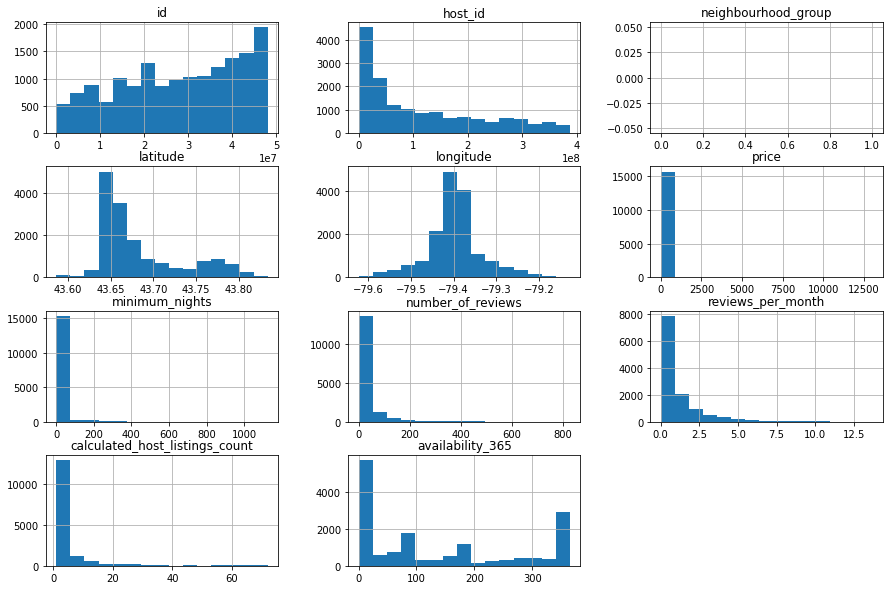

In [7]:
# plotando o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,10));

### **Há *outliers* presentes?**

Pela distribuição do histograma, é possível verificar indícios de *outliers* quando olhamos, por exemplo, para as variáveis `price`, `minimum_nights` e `calculated_host_listings_count`.

Os valores não seguem uma distribuição, distorcendo toda a representação gráfica. Para confirmarmos a presença de *outliers* há duas maneiras rápidas:

* Resumo estatístico por meio do método `discribe()`;
* Plotar `boxplots` para a variável.

#### Resumo *estatístico* por describe()

In [35]:
# vendo o resumo estatístico das variáveis númericas
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,15832.000000,15832.000000,15832.000000,12153.000000,15832.000000,15832.000000
mean,136.679573,28.243115,26.784992,1.083136,5.076049,136.665045
std,316.199774,37.578259,54.284943,1.453023,10.102808,139.811901
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,60.000000,28.000000,1.000000,0.180000,1.000000,0.000000
50%,93.000000,28.000000,6.000000,0.520000,1.000000,89.000000
75%,148.000000,28.000000,27.000000,1.360000,4.000000,270.000000
max,13000.000000,1125.000000,828.000000,13.670000,72.000000,365.000000


Observando o resumo estatístico acima, podemos confirmar algumas hipóteses:

* A variável `price` possui 75% do valor abaixo de 148, porém o seu valor máximo é 13000.
* A variável `minimum_nights` está acima de 365 dias no ano.


#### Boxplot para *minimum_nights*

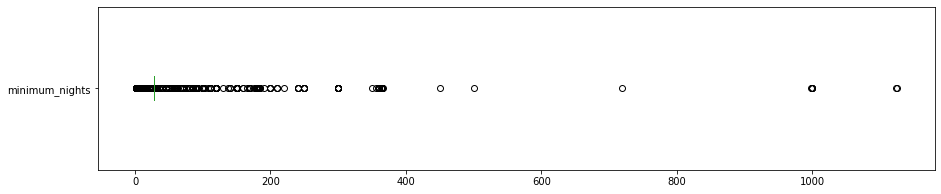

minimum nights: valores acima de 30:
698 entradas
4.4088%


In [37]:
# Plotaremos boxplot para a variável minimum_nights

df.minimum_nights.plot(kind='box', vert=False, figsize=(15,3))
plt.show()

# vendo quantidade de valores acima de 30 dias para minimum_nights
print("minimum nights: valores acima de 30:")
print("{} entradas".format(len(df[df.minimum_nights > 30])))
print("{:.4f}%".format((len(df[df.minimum_nights > 30]) / df.shape[0])*100))

#### Boxplot para *price*

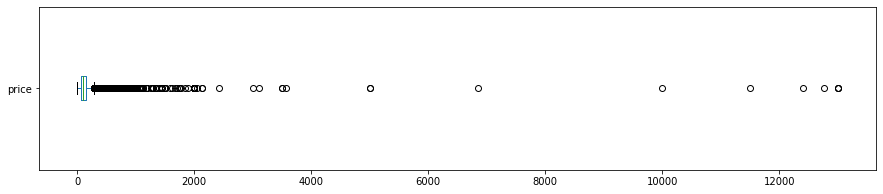


price: valores acima de 1500
68 entradas
0.4295%


In [36]:
# Plotaremos o boxplot para a variável price
df.price.plot(kind='box', vert=False, figsize=(15,3),)
plt.show()

# vendo quantidade de valores acima de 1500 para price
print("\nprice: valores acima de 1500")
print("{} entradas".format(len(df[df.price > 1500])))
print("{:.4f}%".format((len(df[df.price > 1500]) / df.shape[0])*100))

### Histogramas sem *outliers*

Agora que identificamos *outliers* nas variáveis `price` e `minimum_nights`, vamos limpar os *DataFrame* e plotar os histogramas novamente.

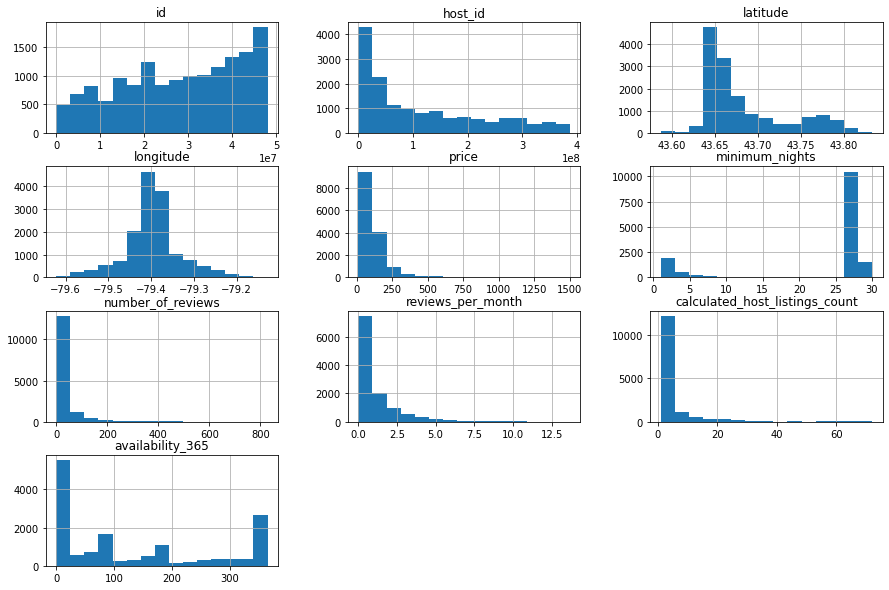

In [38]:
# removendo os *outliers* em um novo DataFrame
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 1500].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.price == 0].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)

#removendo `neighbourhood_group` já que está vazio
df_clean.drop('neighbourhood_group', axis=1, inplace=True)

# Plotando o histograma para as variáveis numéricas
df_clean.hist(bins=15, figsize=(15,10));

### **Qual a correlação existente entre as variáveis?**

Aqui buscaremos relação ou semelhança entre duas variáveis. 

É função do coeficiente de correlação estabelecer qual é a intensidade dessa relação/semelhança. Para identificar as correlações existentes entre as variáveis de interesse, iremos:

* Criar uma matriz de correlação;
* Gerar um *heatmap* (mapa de calor), usando a biblioteca `seaborn`.

In [13]:
# criando uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']].corr()

display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,0.015884,-0.014299,-0.013550,-0.021229,0.015208
minimum_nights,0.015884,1.000000,-0.186304,-0.292925,0.035675,-0.108698
number_of_reviews,-0.014299,-0.186304,1.000000,0.801575,-0.069126,0.049576
reviews_per_month,-0.013550,-0.292925,0.801575,1.000000,-0.048412,0.054448
calculated_host_listings_count,-0.021229,0.035675,-0.069126,-0.048412,1.000000,0.169967
availability_365,0.015208,-0.108698,0.049576,0.054448,0.169967,1.000000


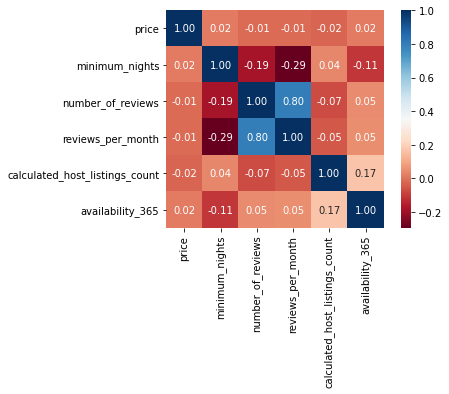

In [15]:
# plotando o heatmap
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True)

### **Qual o tipo de imóvel mais alugado no Airbnb?**

Usando o Airbnb, vemos que existem alguns tipos de locação possíveis, como: apartamentos e casas inteiras, quartos e quartos compartilhados. A coluna variável `room_type` indica o tipo de locação anunciada. 

Vamos verificar a quantidade de ocorrência de cada tipo de aluguel na cidade de Toronto, usando o método `value_counts()`:

In [16]:
# Vendo a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

Entire home/apt    9522
Private room       5264
Shared room         243
Hotel room           49
Name: room_type, dtype: int64

In [17]:
# Vendo a porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts() / df_clean.shape[0]

Entire home/apt    0.631516
Private room       0.349118
Shared room        0.016116
Hotel room         0.003250
Name: room_type, dtype: float64

Assim, identificamos que a maioria dos imóveis disponíveis são casas/apartamentos inteiros (aprox. 63%), seguidos de quartos individuais (aprox. 35%) e quartos compartilhados (aprox. 16%),].

### **Qual a localidade mais cara de Toronto?**

Uma maneira de verificar uma variável em função da outra é usando `groupby()`. Nesse caso, iremos comparar os bairros (*neighbourhoods*) a partir do preço de locação.

In [18]:
# Comparando bairros a partir do preço
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Kingsway South                       194.400000
Rosedale-Moore Park                  189.361702
Yonge-St.Clair                       189.078431
Lawrence Park South                  187.341463
Forest Hill South                    183.478261
Leaside-Bennington                   172.555556
Waterfront Communities-The Island    169.212471
Markland Wood                        165.500000
St.Andrew-Windfields                 164.128205
Niagara                              155.738255
Name: price, dtype: float64

Acima, vemos que bairros como *Kingsway South*, *Rosedale-Moore Park* e *Yonge-St.Clair* estão como os mais caros de Toronto. 

Para ter certeza que estes valores representam a realidade, *é importante que verifiquemos a quantidade de entrada que existem neles*, uma vez que a média pode ser diretamente afetada por isso, dessa forma garantindo que a representação está correta.

Ao checarmos as entradas, veremos que o fato dos bairros de *Waterfront Communities-The Island* (7º) e *Niagara* (10º) possuírem mais entradas que os três ranqueados ao topo afeta diretamente a composição do ranking. 
Por terem mais entradas, possuem valores mais diversos, dessa forma mesmo que haja imóveis mais caros nesses bairros, o fato de também haver imóveis mais baratos faz com que a média caia, possivelmente mudando a percepção do ranking. 

Contudo, não iremos nos apegar a esse detalhe, seguiremos a análise focando nas médias apresentadas.

In [19]:
# Verificando a quantidade de imóveis em cinco dos dez bairros ranqueados de Toronto
print(df_clean[df_clean.neighbourhood == "Kingsway South"].shape)
print(df_clean[df_clean.neighbourhood == "Rosedale-Moore Park"].shape)
print(df_clean[df_clean.neighbourhood == "Yonge-St.Clair"].shape)
print(df_clean[df_clean.neighbourhood == "Waterfront Communities-The Island"].shape)
print(df_clean[df_clean.neighbourhood == "Niagara"].shape)

(10, 15)
(94, 15)
(51, 15)
(2598, 15)
(596, 15)


Uma vez que possuímos as variáveis de Latitude e Longitude para os imóveis, é possível plotar cada ponto, criando assim uma visualização da localização dos imóveis. Para isso, considera-se `x=longitude` e `y=latitude`.

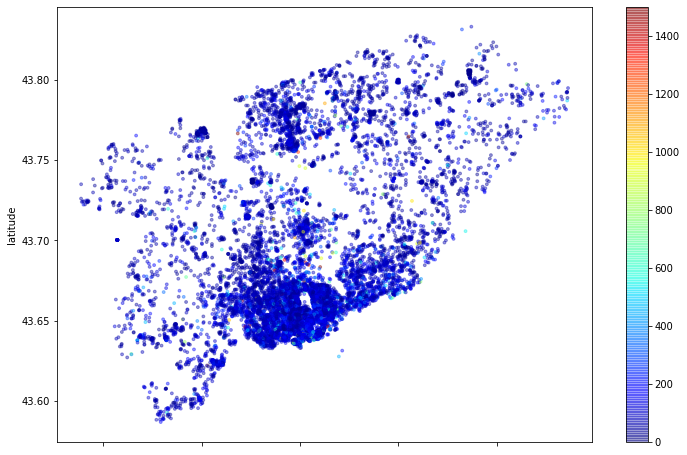

In [20]:
# Plotando os imóveis pela latitude-longitude
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8, cmap=plt.get_cmap('jet'), figsize=(12,8));

### **Qual é a média de preço dos imóveis disponíveis para aluguel (price)?**

Abaixo podemos ver a média de preço dos alugueis por porcentagem, sendo os preços da maioria dos imóveis entre 50 e 150.

In [31]:
# Verificando média de preço por porcentagem
df_clean.price.value_counts() / df_clean.shape[0]

100     0.031171
50      0.026595
150     0.023611
60      0.023080
70      0.022549
          ...   
377     0.000066
588     0.000066
353     0.000066
604     0.000066
1079    0.000066
Name: price, Length: 534, dtype: float64

### **Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

Uma das formas de verificar a média do mínimo de noites requeridas pelos anfitriões é verificando por porcentagem. Abaixo vemos que a maioria dos imóveis disponíveis (aproximadamente 70%) pede ao menos 28 noites no imóvel.

In [22]:
# verificando média da coluna por porcentagem
df_clean.minimum_nights.value_counts() / df_clean.shape[0]

28    0.694389
1     0.078525
30    0.067317
2     0.051731
29    0.036344
3     0.027988
7     0.012071
5     0.012004
4     0.006566
14    0.004974
6     0.002056
10    0.001923
21    0.000995
12    0.000862
15    0.000730
20    0.000464
27    0.000398
16    0.000199
18    0.000133
13    0.000133
25    0.000066
17    0.000066
8     0.000066
Name: minimum_nights, dtype: float64

## Conclusões

Ainda que com dados resumidos, é possível perceber que o conjunto de dados possui alguns *outliers* e que algumas localidades possuem poucos imóveis disponíveis, o que distorce a análise de alguns atributos. 

Ainda assim, podemos constatar, baseado nos dados aqui apresentados, que apesar da média de preço dos alugueis serem em sua maioria entre 50 e 150 dólares, grande parte dos proprietários esperam que os hospedes tenham uma longa estadia.

Esta análise foi feita superficialmente. Para uma análise exploratória completa, recomenda-se o uso do conjunto de dados com 106 variáveis disponíveis, como dito no início desta análise. 
